# Implement

i)                    K-Nearest Neighbors algorithm ,ii)                   Logistic Regression

iii)                 Support Vector Machines (SVM) ,iv)                 Decision Trees

v)                  Random Forest:, vi)                 Naive Bayes

vii)               Gradient Boosting ,viii)              AdaBoost

ix)                 XGBoost

on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


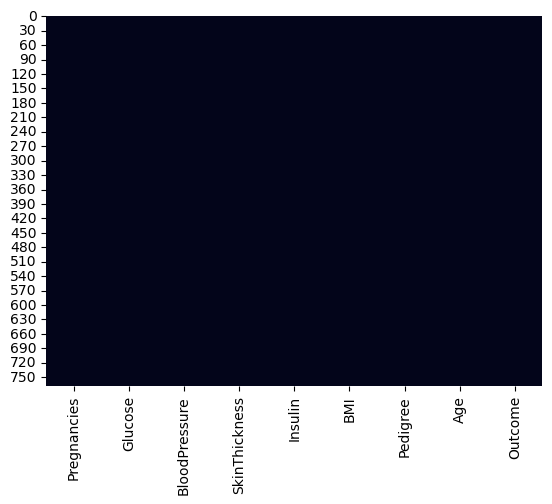

In [3]:
sns.heatmap(df.isnull(), cbar=False)
df_corr = df.corr()
df.keys

corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()
features
X = df[features]
X = X.drop("Outcome", axis=1)
X.head()
y = df['Outcome']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
df_corr = df.corr()
df.keys

corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()

X = df[features]
X = X.drop("Outcome", axis=1)
X.head()
y = df['Outcome']

In [14]:
corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()
features


Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
X = df[features]
X = X.drop("Outcome", axis=1)
X.head()
y = df['Outcome']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracys = []
recalls = []
precisions = []
f1_scores = []
errors = []
cf_matrix = []
fpers = []
tpers = []



In [7]:
def process(clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    error_rate = 1 - accuracy
    precision = confusion[0][0] / (confusion[0][0] + confusion[1][0]) * 100
    recall = confusion[0][0] / (confusion[0][0] + confusion[0][1]) * 100
    f1_score = ((2 * precision * recall) / (precision + recall)) / 100

    # ROC curve
    probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
    fper, tper, _ = roc_curve(y_test, probs)

    # Append results to respective lists
    fpers.append(fper)
    tpers.append(tper)
    accuracys.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    errors.append(error_rate)
    cf_matrix.append(confusion)

    cf_matrix.append(confusion)



In [8]:
algo = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    GaussianNB(),  # Updated to GaussianNB
    SVC(gamma=0.01, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),  # Added Logistic Regression
    XGBClassifier()  # Added XGBoost
]

# Names of algorithms
algos = [
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "SVM",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "Logistic Regression",  # Added Logistic Regression
    "XGBoost"  # Added XGBoost
]

In [9]:
for clf in algo:
    process(clf)

Metric = pd.DataFrame({
    'Algorithm': algos,
    "Error rate": errors,
    'Accuracy': accuracys,
    'Recall': recalls,
    'Precision': precisions,
    'F1_score': f1_scores
})
Metric


,Algorithm,Error rate,Accuracy,Recall,Precision,F1_score
0,KNN,0.331169,0.668831,69.696970,76.666667,0.730159
1,Decision Tree,0.259740,0.740260,71.717172,85.542169,0.780220
2,Naive Bayes,0.220779,0.779221,81.818182,83.505155,0.826531
3,SVM,0.318182,0.681818,83.838384,71.551724,0.772093
4,Random Forest,0.246753,0.753247,77.777778,82.795699,0.802083
5,AdaBoost,0.272727,0.727273,79.797980,78.217822,0.790000
6,Gradient Boosting,0.253247,0.746753,77.777778,81.914894,0.797927
7,Logistic Regression,0.240260,0.759740,81.818182,81.000000,0.814070
8,XGBoost,0.266234,0.733766,74.747475,82.222222,0.783069


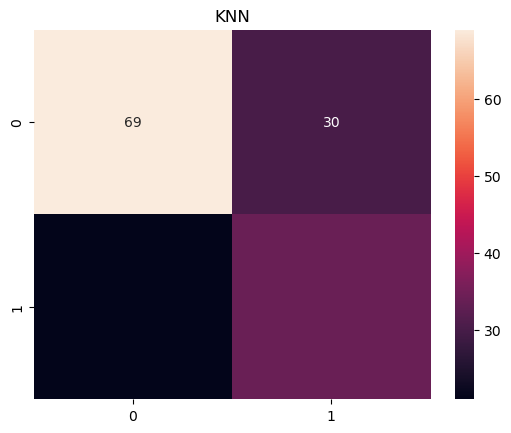

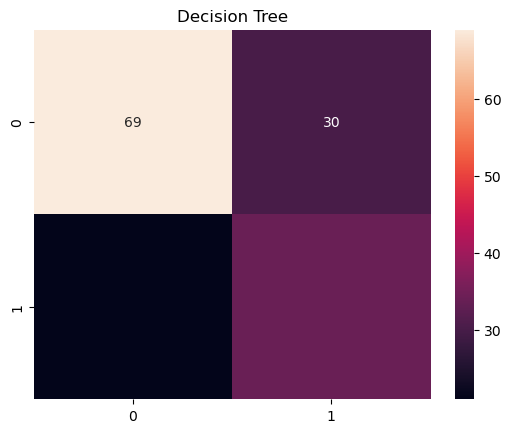

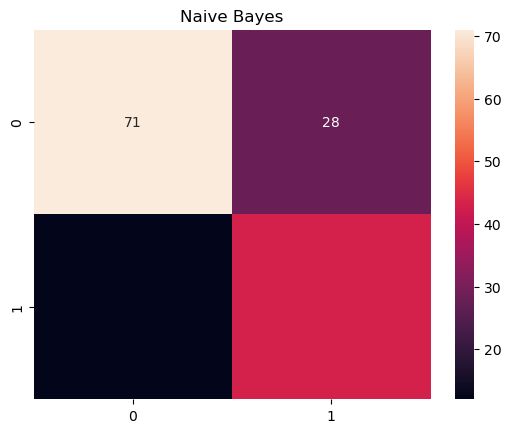

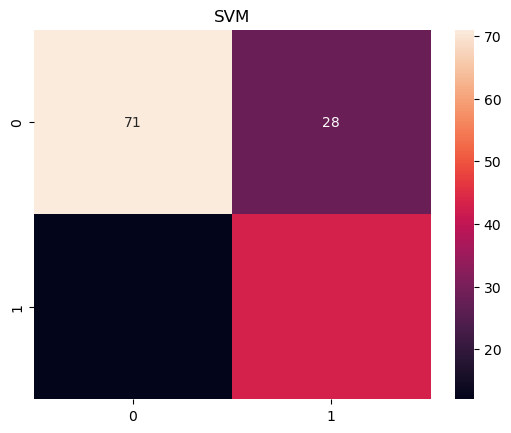

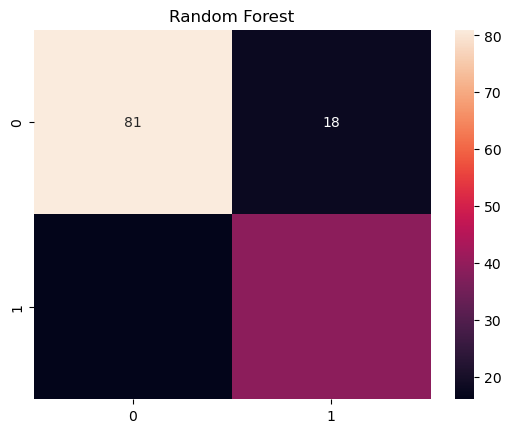

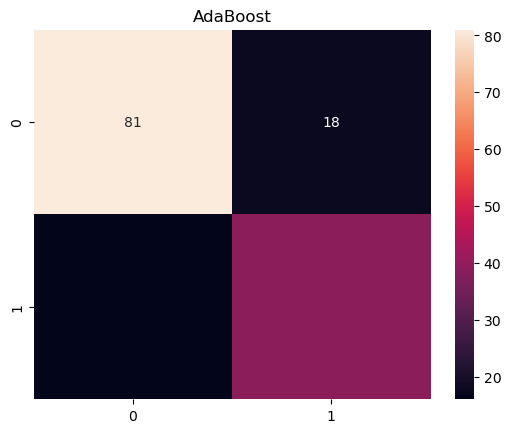

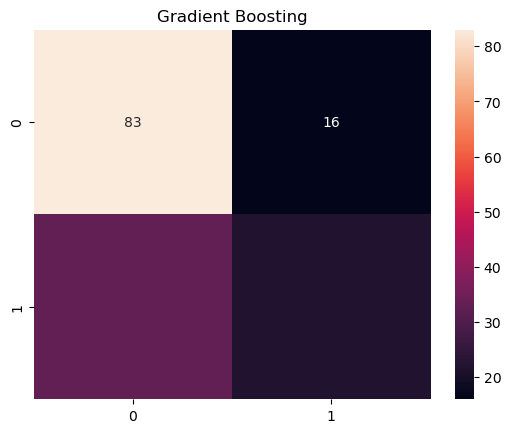

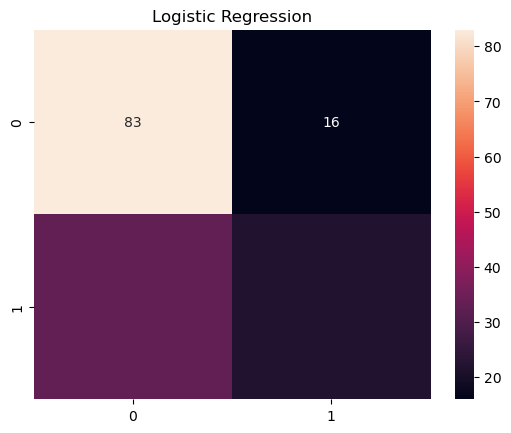

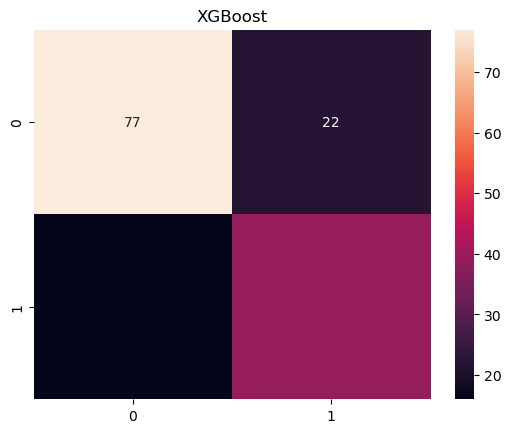

In [10]:
for i in range(len(algos)):
    ax = plt.axes()
    sns.heatmap(cf_matrix[i], annot=True, ax=ax)
    # sns.heatmap(data, ax = ax)

    ax.set_title(algos[i])
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


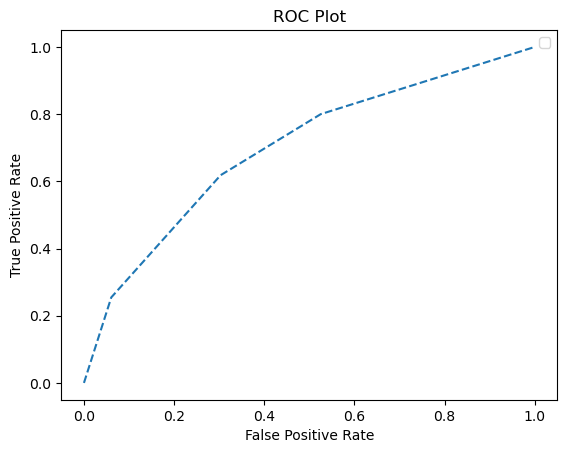

In [11]:

plt.plot(fpers[0], tpers[0], linestyle='--')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()
# Show plot
plt.show()


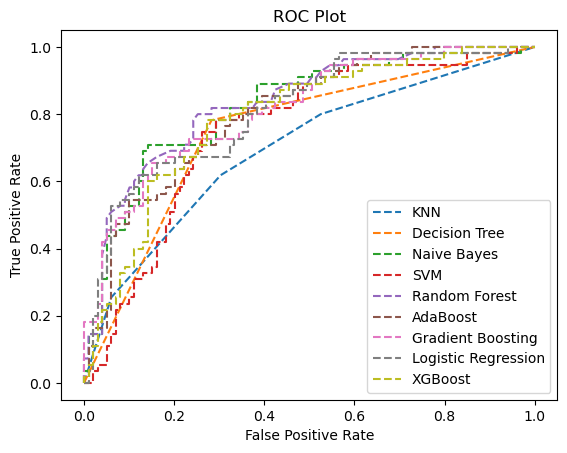

In [12]:
# Plot ROC curves
for i in range(len(fpers)):
    plt.plot(fpers[i], tpers[i], linestyle='--', label=algos[i])

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()